Accuracy: 0.55
Precision (macro): 0.49259259259259264
Recall (macro): 0.5287878787878788

Classification Report:
               precision    recall  f1-score   support

     billing       0.78      0.64      0.70        11
     general       0.20      0.20      0.20         5
   technical       0.50      0.75      0.60         4

    accuracy                           0.55        20
   macro avg       0.49      0.53      0.50        20
weighted avg       0.58      0.55      0.55        20



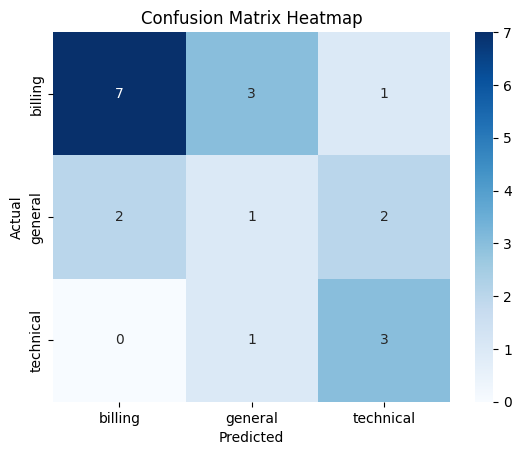

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score

# ==== Load dataset ====
# Replace 'your_dataset.csv' with your actual file name
df = pd.read_csv('/content/support_cases.csv')

# ==== Features and target ====
X = df[['message_length', 'response_time']]
y = df['case_type']

# ==== Encode target labels ====
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# ==== Train-test split ====
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# ==== Model training ====
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# ==== Predictions ====
y_pred = model.predict(X_test)

# ==== Evaluation ====
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred, average='macro'))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

# ==== Confusion matrix heatmap ====
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()
